Radiation State: 0
Induction State: 0
Conduction State: 1
Convection State: 2
Absorption State: 3
Transduction State: 4
Decision State: 5
Conception State: 6
Radiation State: 7
Induction State: 8
Conduction State: 9


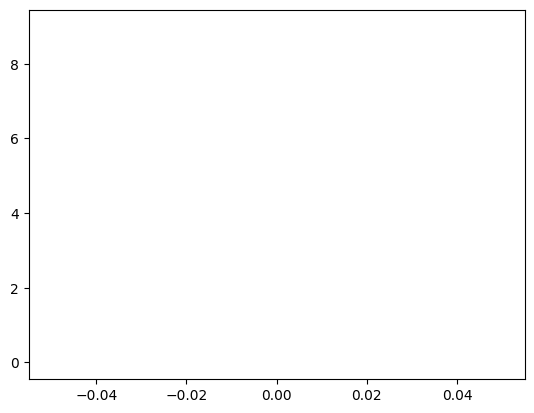

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt


"""
radiation -> induction -> conduction -> convection -> absorption -> transduction -> decision -> mediation -> radiation
"""

class CycleState:
    """Parent class for cycle state vectors"""
    
    def __init__(self, state):
        self.state = state
        
    def couple(self, coupling):
        """Apply a coupling coeffient to the state"""
        self.state = coupling * self.state

class StateVector(CycleState):

    def __init__(self, state):
        super().__init__(state)
        
        self.name = None # State name
        self.order = None # Order in cycle
        self.description = None # Short description
        
        self.locality = None # Local vs nonlocal
        self.reverse = None # Reverse state mapping
        
    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"
    
    def plot(self):
        # Simple plot 
        plt.plot(self.state)
        
    def reverse(self):
        # Return reverse state object
        return self.reverse[self] 

class Radiation(StateVector):

    def __init__(self, state):
        super().__init__(state)
        
        self.name = "Radiation"
        self.locality = "nonlocal"
        self.reverse = {self: Absorption}

    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"

class Transduction(StateVector):
    
    def __init__(self, state):
        super().__init__(state)

        self.name = "Transduction"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Dissolution}
    
    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"

# Add more subclasses for induction, conduction etc.
class Conduction(StateVector):

    def __init__(self, state):
        super().__init__(state)

        self.name = "Conduction"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Convection}
    
    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"

class Absorption(StateVector):

    def __init__(self, state):
        super().__init__(state)

        self.name = "Absorption"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Radiation}

    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"

class Decision(StateVector):
    
    def __init__(self, state):
        super().__init__(state)

        self.name = "Decision"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Disintegration}

    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"
       
# Add more subclasses for induction, conduction etc.
class Induction(StateVector):

    def __init__(self, state):
        super().__init__(state)

        self.name = "Induction"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Conduction}

    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"

class Disintegration(StateVector):
        
    def __init__(self, state):
        super().__init__(state)

        self.name = "Disintegration"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Transduction}

    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"


# Add more subclasses for induction, conduction etc.
class Convection(StateVector):

    def __init__(self, state):
        super().__init__(state)

        self.name = "Convection"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Absorption}

    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"

class Conception(StateVector):
    
    def __init__(self, state):
        super().__init__(state)

        self.name = "Conception"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Radiation}

    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"

class Dissolution(StateVector):
        
    def __init__(self, state):
        super().__init__(state)

        self.name = "Dissolution"
        self.locality = 'local' # Specify locality
        self.reverse = {self: Transduction}

    def __str__(self):
        # Print state details
        return f"{self.name} State: {self.state}"

# Transformations
def radiate(state):
    return Radiation(state) 

def absorb(state):
    return Absorption(state)

# Dictionary of all state transformations 
transitions = {
    Radiation: Induction,
    Induction: Conduction,
    Conduction: Convection,
    Convection: Absorption,
    Absorption: Transduction,
    Transduction: Decision,
    Decision: Conception,
    Conception: Radiation
}

# Utility function to get next state
def get_next_state(current_state):
   return transitions[type(current_state)]

# Build cycle sequence
state_sequence = [Radiation(0)] 

for i in range(10):
    state_sequence.append(get_next_state(state_sequence[-1])(i))

# Plot sequence
for state in state_sequence:
    state.plot()

# Print sequence
for state in state_sequence:
    print(state)